##   R मधील Pandas चा उपयोग

पांडासच्या उपयोगप्रकरणासाठी R मध्ये dplyr लायब्ररी वापरावी लागते. आपण नेहमीच्या डेटा सायन्स लायब्ररी आयात करण्यापासून सुरुवात करू.


In [28]:
options(warn=-1)
library(dplyr)
library(tidyverse)
library(lubridate)
library(zoo)
library(xts)
library('ggplot2')

सिरीज ही यादी किंवा 1D-अ‍ॅरेसारखी असते, पण त्यात इंडेक्स असतो. सर्व ऑपरेशन्स इंडेक्सशी संलग्न असतात. R मध्ये पंक्तींचे इंडेक्सिंग करण्यासाठी आपल्याला row.names वापरावे लागते.


In [29]:
a<- 1:9

In [30]:
b = c("I","like","to","use","Python","and","Pandas","very","much")

In [31]:
a1 = length(a)
b1 = length(b)

In [32]:
a = data.frame(a,row.names = c(1:a1))
print(a)

  a
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9


In [33]:
b = data.frame(b,row.names = c(1:b1))
print(b)

       b
1      I
2   like
3     to
4    use
5 Python
6    and
7 Pandas
8   very
9   much


सिरीजचा एक सामान्य उपयोग म्हणजे टाइम सिरीज. टाइम सिरीजमध्ये, इंडेक्सला एक विशेष रचना असते - सामान्यतः तारखा किंवा डेटटाइम्सची श्रेणी. टाइम सिरीज तयार करण्याचा सर्वात सोपा मार्ग म्हणजे ts फंक्शनचा वापर. पण आपण टाइम सिरीज अंमलात आणण्यासाठी दुसऱ्या पद्धतीचा प्रयत्न करू. seq फंक्शनचा वापर करून तारखांचा इंडेक्स तयार करण्यासाठी आपल्याला lubridate लायब्ररीचा वापर करावा लागेल.

समजा आपल्याकडे अशी एक सिरीज आहे जी दररोज खरेदी केलेल्या उत्पादनाचे प्रमाण दर्शवते, आणि आपल्याला माहित आहे की प्रत्येक रविवारी आपल्याला स्वतःसाठी एक अतिरिक्त वस्तू घ्यावी लागते. सिरीजचा वापर करून हे कसे मॉडेल करायचे ते येथे दिले आहे:


In [34]:
# We will use ggplot2 for visualizing the data
# If you want to change the plot size repr library will be used
library(repr)
options(repr.plot.width = 12,repr.plot.height=6)

[1] "length of index is  366"


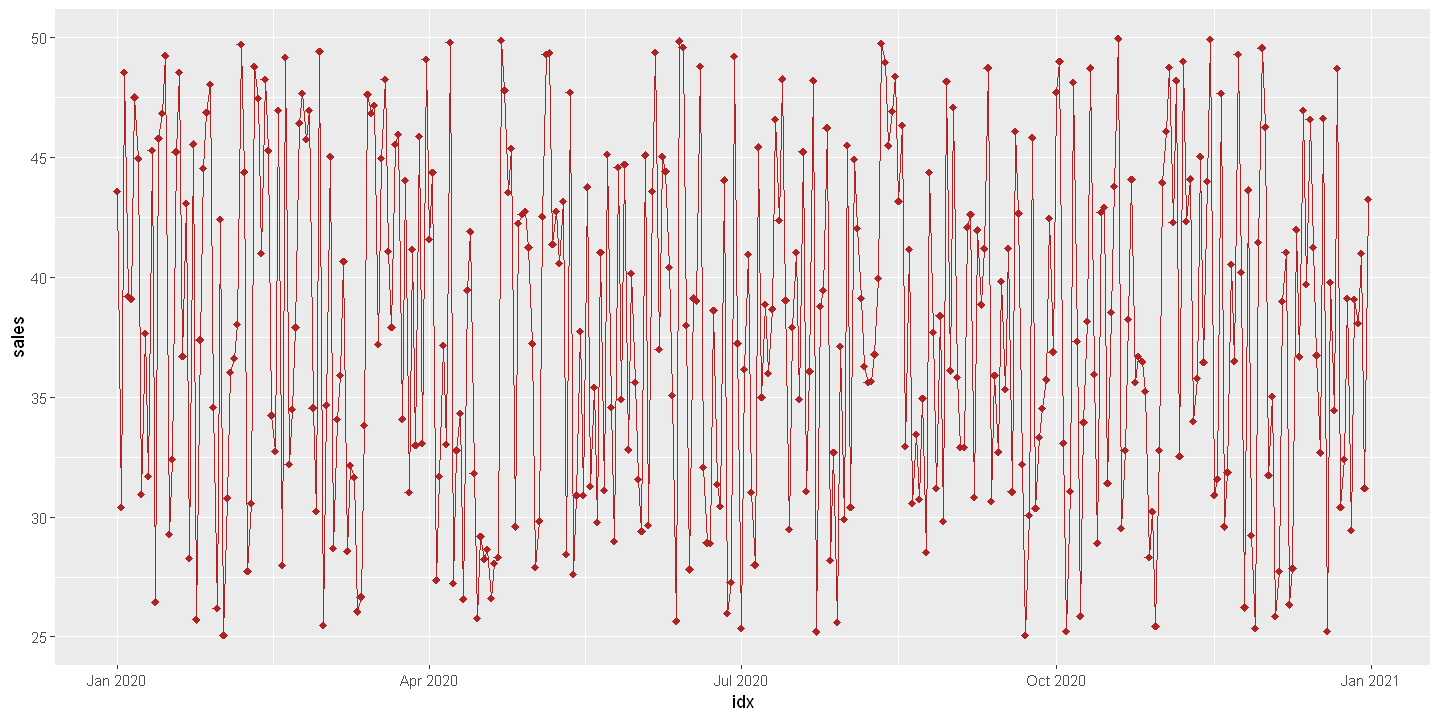

In [35]:
start_date <- mdy("Jan 1, 2020")
end_date <- mdy("Dec 31, 2020")
idx = seq(start_date,end_date,by ='day')
print(paste("length of index is ",length(idx)))
size = length(idx)
sales = runif(366,min=25,max=50)
sold_items <- data.frame(row.names=idx[0:size],sales)
ggplot(sold_items,aes(x=idx,y=sales)) + geom_point(color = "firebrick", shape = "diamond", size = 2) +
    geom_line(color = "firebrick", size = .3)

आम्ही additional_items आणि sold_items एकत्र करत आहोत जेणेकरून आम्हाला एकूण उत्पादनांची संख्या शोधता येईल.  
जसे तुम्ही पाहू शकता, येथे एकूण संख्या शोधण्यात आम्हाला अडचण येत आहे, कारण आम्हाला NaN मूल्य मिळत आहे. साप्ताहिक मालिकेत उल्लेख न केलेले दिवस गहाळ (NaN) मानले जातात, आणि जर आपण NaN ला एखाद्या संख्येशी जोडले तर त्याचा परिणाम NaN होतो.  
जोडणी करण्यासाठी, आपल्याला NaN ला 0 ने बदलणे आवश्यक आहे.  


In [36]:
index = seq(start_date,end_date,by = 'week')
sz = length(index)
additional_product <- rep(10,53)
additional_items  <- data.frame(row.names = index[0:sz],additional_product)
additional_items
# we are merging two dataframe so that we can add
additional_item = merge(additional_items,sold_items, by = 0, all = TRUE)[-1] 
total  = data.frame(row.names=idx[0:size],additional_item$additional_product + additional_item$sales)
colnames(total) =  c('total')
total

additional_product
2020-01-01 10                
2020-01-08 10                
2020-01-15 10                
2020-01-22 10                
2020-01-29 10                
2020-02-05 10                
2020-02-12 10                
2020-02-19 10                
2020-02-26 10                
2020-03-04 10                
2020-03-11 10                
2020-03-18 10                
2020-03-25 10                
2020-04-01 10                
2020-04-08 10                
2020-04-15 10                
2020-04-22 10                
2020-04-29 10                
2020-05-06 10                
2020-05-13 10                
2020-05-20 10                
2020-05-27 10                
2020-06-03 10                
2020-06-10 10                
2020-06-17 10                
2020-06-24 10                
2020-07-01 10                
2020-07-08 10                
2020-07-15 10                
2020-07-22 10                
2020-07-29 10                
2020-08-05 10                
2020-08-12 10                
2020-08-19 10                
2020-08-26 10                
2020-09-02 10                
2020-09-09 10                
2020-09-16 10                
2020-09-23 10                
2020-09-30 10                
2020-10-07 10                
2020-10-14 10                
2020-10-21 10                
2020-10-28 10                
2020-11-04 10                
2020-11-11 10                
2020-11-18 10                
2020-11-25 10                
2020-12-02 10                
2020-12-09 10                
2020-12-16 10                
2020-12-23 10                
2020-12-30 10

total   
2020-01-01 53.59979
2020-01-02       NA
2020-01-03       NA
2020-01-04       NA
2020-01-05       NA
2020-01-06       NA
2020-01-07       NA
2020-01-08 40.93455
2020-01-09       NA
2020-01-10       NA
2020-01-11       NA
2020-01-12       NA
2020-01-13       NA
2020-01-14       NA
2020-01-15 59.24704
2020-01-16       NA
2020-01-17       NA
2020-01-18       NA
2020-01-19       NA
2020-01-20       NA
2020-01-21       NA
2020-01-22 38.26416
2020-01-23       NA
2020-01-24       NA
2020-01-25       NA
2020-01-26       NA
2020-01-27       NA
2020-01-28       NA
2020-01-29 44.58327
2020-01-30       NA
...        ...     
2020-12-02 41.74811
2020-12-03       NA
2020-12-04       NA
2020-12-05       NA
2020-12-06       NA
2020-12-07       NA
2020-12-08       NA
2020-12-09 37.85650
2020-12-10       NA
2020-12-11       NA
2020-12-12       NA
2020-12-13       NA
2020-12-14       NA
2020-12-15       NA
2020-12-16 46.73560
2020-12-17       NA
2020-12-18       NA
2020-12-19       NA
2020-12-20       NA
2020-12-21       NA
2020-12-22       NA
2020-12-23 40.42143
2020-12-24       NA
2020-12-25       NA
2020-12-26       NA
2020-12-27       NA
2020-12-28       NA
2020-12-29       NA
2020-12-30 41.20298
2020-12-31       NA

In [37]:
additional_item[is.na(additional_item)] = 0
total  = data.frame(row.names=idx[0:size],additional_item$additional_product + additional_item$sales)
colnames(total) =  c('total')
total

total   
2020-01-01 53.59979
2020-01-02 30.41127
2020-01-03 48.54839
2020-01-04 39.20897
2020-01-05 39.09894
2020-01-06 47.53019
2020-01-07 44.94766
2020-01-08 40.93455
2020-01-09 37.66561
2020-01-10 31.68825
2020-01-11 45.30576
2020-01-12 26.45509
2020-01-13 45.81249
2020-01-14 46.84547
2020-01-15 59.24704
2020-01-16 29.28688
2020-01-17 32.41731
2020-01-18 45.23295
2020-01-19 48.54330
2020-01-20 36.69353
2020-01-21 43.09588
2020-01-22 38.26416
2020-01-23 45.56863
2020-01-24 25.70944
2020-01-25 37.38721
2020-01-26 44.53955
2020-01-27 46.88427
2020-01-28 48.05540
2020-01-29 44.58327
2020-01-30 26.19490
...        ...     
2020-12-02 41.74811
2020-12-03 35.03915
2020-12-04 25.84637
2020-12-05 27.73147
2020-12-06 39.00993
2020-12-07 41.03187
2020-12-08 26.33862
2020-12-09 37.85650
2020-12-10 41.98943
2020-12-11 36.68901
2020-12-12 46.96883
2020-12-13 39.70374
2020-12-14 46.59464
2020-12-15 41.24742
2020-12-16 46.73560
2020-12-17 32.68275
2020-12-18 46.64238
2020-12-19 25.22163
2020-12-20 39.79997
2020-12-21 34.45013
2020-12-22 48.71183
2020-12-23 40.42143
2020-12-24 32.41991
2020-12-25 39.12296
2020-12-26 29.43616
2020-12-27 39.09337
2020-12-28 38.09288
2020-12-29 41.00681
2020-12-30 41.20298
2020-12-31 43.25232

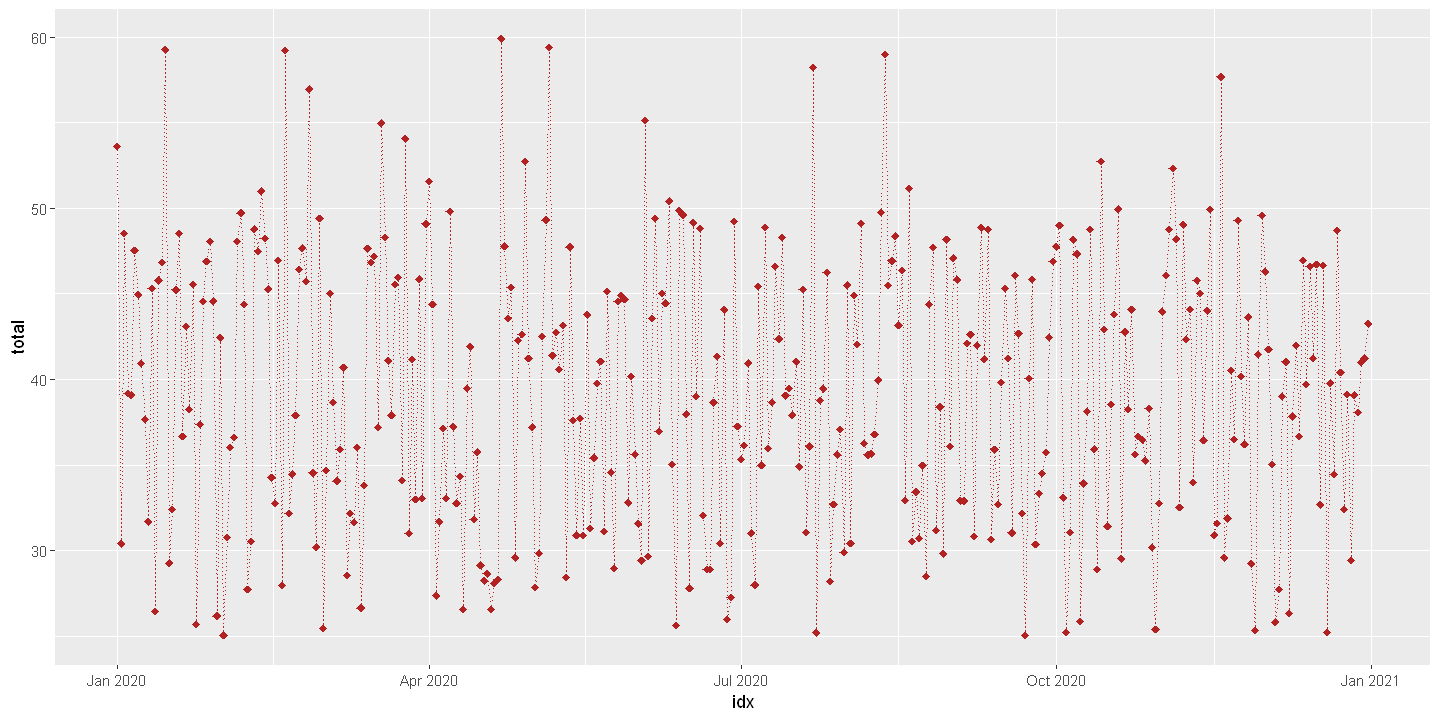

In [38]:
ggplot(total,aes(x=idx,y=total)) + geom_point(color = "firebrick", shape = "diamond", size = 2) +
    geom_line(color = "firebrick", linetype = "dotted", size = .3)

आम्हाला मासिक पातळीवर एकूण उत्पादनांची संख्या विश्लेषित करायची आहे. त्यामुळे, आम्ही महिन्यातील एकूण उत्पादनांची सरासरी काढतो आणि बारग्राफ काढतो.


In [39]:
index = seq(start_date,end_date,by ='month')


              total
2020-01-31 41.03847
2020-02-29 40.91568
2020-03-31 39.27424
2020-04-30 37.63589
2020-05-31 38.75129
2020-06-30 38.75744
2020-07-31 38.35212
2020-08-31 40.43712
2020-09-30 38.90043
2020-10-31 37.99855
2020-11-30 41.20759
2020-12-31 38.46355

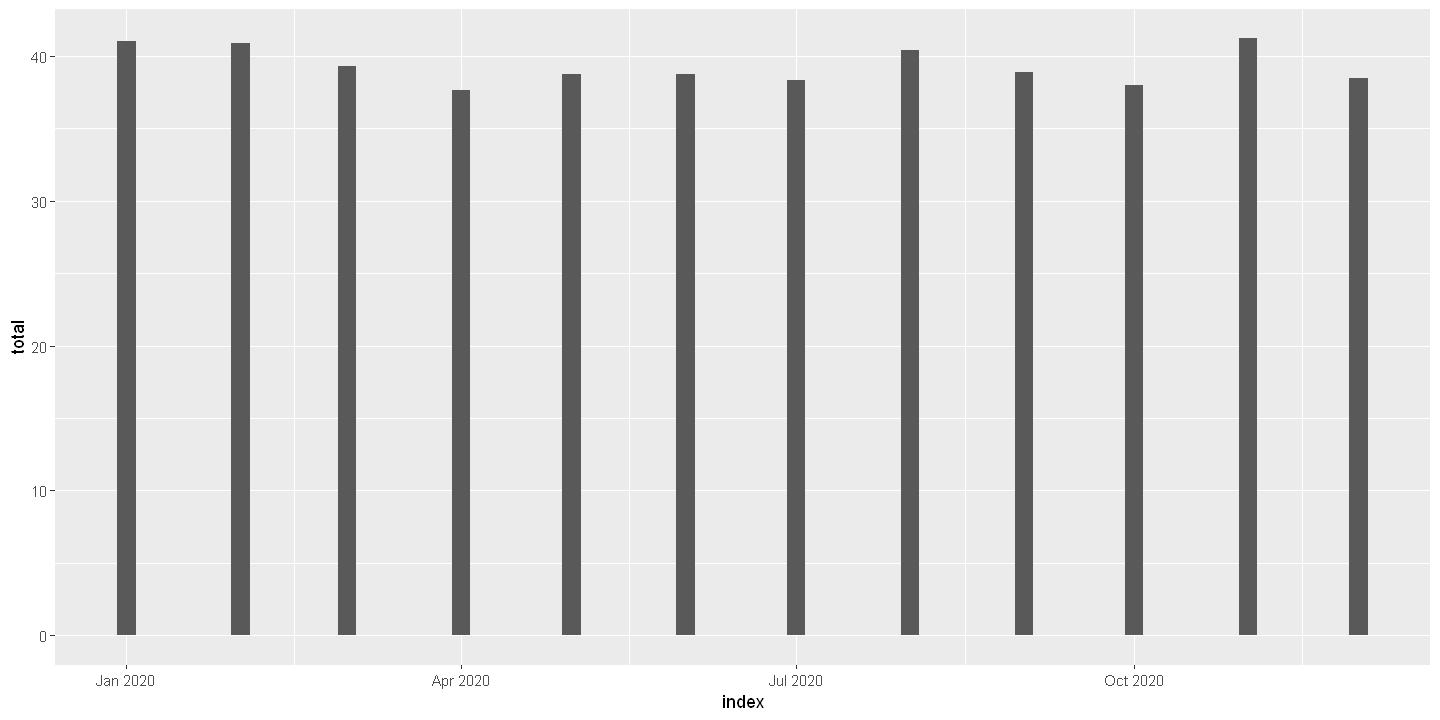

In [40]:
x<- as.xts(total, dateFormat ="Date")
(monthly<-apply.monthly(x,mean))
ggplot(monthly, aes(x=index, y=total)) + 
  geom_bar(stat = "identity", width=5) 

## डेटा फ्रेम
डेटाफ्रेम म्हणजे मूलत: समान अनुक्रमणिका असलेल्या मालिकांचा संग्रह आहे. आपण अनेक मालिका एकत्र करून डेटाफ्रेम तयार करू शकतो.  
उदाहरणार्थ, आपण a आणि b मालिकांचा डेटाफ्रेम तयार करत आहोत.


In [41]:
a = data.frame(a,row.names = c(1:a1))

In [42]:
b = data.frame(b,row.names = c(1:b1))

In [43]:
df<- data.frame(a,b)
df

a b     
1 1 I     
2 2 like  
3 3 to    
4 4 use   
5 5 Python
6 6 and   
7 7 Pandas
8 8 very  
9 9 much

आम्ही rename फंक्शनचा वापर करून स्तंभाचे नाव देखील बदलू शकतो


In [44]:
df = 
  rename(df,
    A = a,
    B = b,
  )

In [45]:
df

A B     
1 1 I     
2 2 like  
3 3 to    
4 4 use   
5 5 Python
6 6 and   
7 7 Pandas
8 8 very  
9 9 much

आम्ही select फंक्शनचा वापर करून डेटा फ्रेममधील एका स्तंभाची निवड देखील करू शकतो


In [46]:
cat("Column A (series):\n")
select(df,'A')

Column A (series):


A
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9

आम्ही मालिकेवरील विशिष्ट तार्किक निकष पूर्ण करणाऱ्या ओळी काढू.


In [47]:
df[df$A<5,]

A B   
1 1 I   
2 2 like
3 3 to  
4 4 use

In [48]:
df[df$A>5 & df$A<7,]

A B  
6 6 and

नवीन स्तंभ तयार करणे.

खालील कोड एक सिरीज तयार करतो जी 'a' च्या सरासरी मूल्यापासून त्याचे विचलन मोजते आणि नंतर ती विद्यमान डेटा फ्रेममध्ये विलीन करतो.


In [49]:
df$DivA <- df$A - mean(df$A)

In [50]:
df

A B      DivA
1 1 I      -4  
2 2 like   -3  
3 3 to     -2  
4 4 use    -1  
5 5 Python  0  
6 6 and     1  
7 7 Pandas  2  
8 8 very    3  
9 9 much    4

आम्ही एक मालिका तयार करत आहोत जी A स्तंभाच्या स्ट्रिंगची लांबी मोजते आणि नंतर विद्यमान डेटा फ्रेममध्ये विलीन करते


In [51]:
df$LenB <- str_length(df$B)

In [52]:
df

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6   
6 6 and     1   3   
7 7 Pandas  2   6   
8 8 very    3   4   
9 9 much    4   4

संख्या आधारित पंक्ती निवडणे


In [53]:
df[0:5,]

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6

***गटबद्ध करणे म्हणजे विशिष्ट अटींवर आधारित अनेक स्तंभांना गटबद्ध करणे आणि फरक पाहण्यासाठी summarise फंक्शन वापरणे***

समजा, आपल्याला LenB च्या प्रत्येक दिलेल्या संख्येसाठी स्तंभ A चे सरासरी मूल्य गणना करायचे आहे. मग आपण आपले DataFrame LenB ने गटबद्ध करू शकतो आणि त्याचे सरासरी मूल्य शोधून त्याला a असे नाव देऊ शकतो.


In [54]:
df1 = df %>% group_by(LenB) %>% summarise(a = mean(A))

In [55]:
df1

LenB a       
1 1    1.000000
2 2    3.000000
3 3    5.000000
4 4    6.333333
5 6    6.000000

In [56]:
df2 = df %>% group_by(LenB) %>%
summarise(MEAN = mean(A),count =length(DivA))

## प्रिंटिंग आणि प्लॉटिंग
जेव्हा आपण head(df) कॉल करतो, तेव्हा ते डेटा फ्रेम टेबल स्वरूपात प्रिंट करेल.

कोणत्याही डेटा सायन्स प्रोजेक्टचा पहिला टप्पा म्हणजे डेटा साफसफाई आणि व्हिज्युअलायझेशन, त्यामुळे डेटासेटचे व्हिज्युअलायझेशन करणे आणि काही उपयुक्त माहिती मिळवणे महत्त्वाचे आहे.


In [57]:
#dataset = read.csv("file name")

In [58]:
head(df)

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6   
6 6 and     1   3

ggplot2 ही एक उत्कृष्ट लायब्ररी आहे कारण ती डेटा फ्रेममधील डेटावरून जटिल प्लॉट्स सोप्या पद्धतीने तयार करण्यास मदत करते.

ही लायब्ररी प्लॉटसाठी कोणते व्हेरिएबल्स वापरायचे, ते कसे प्रदर्शित करायचे आणि सामान्य दृश्यात्मक गुणधर्म कसे असावेत यासाठी अधिक प्रोग्रामॅटिक इंटरफेस प्रदान करते.


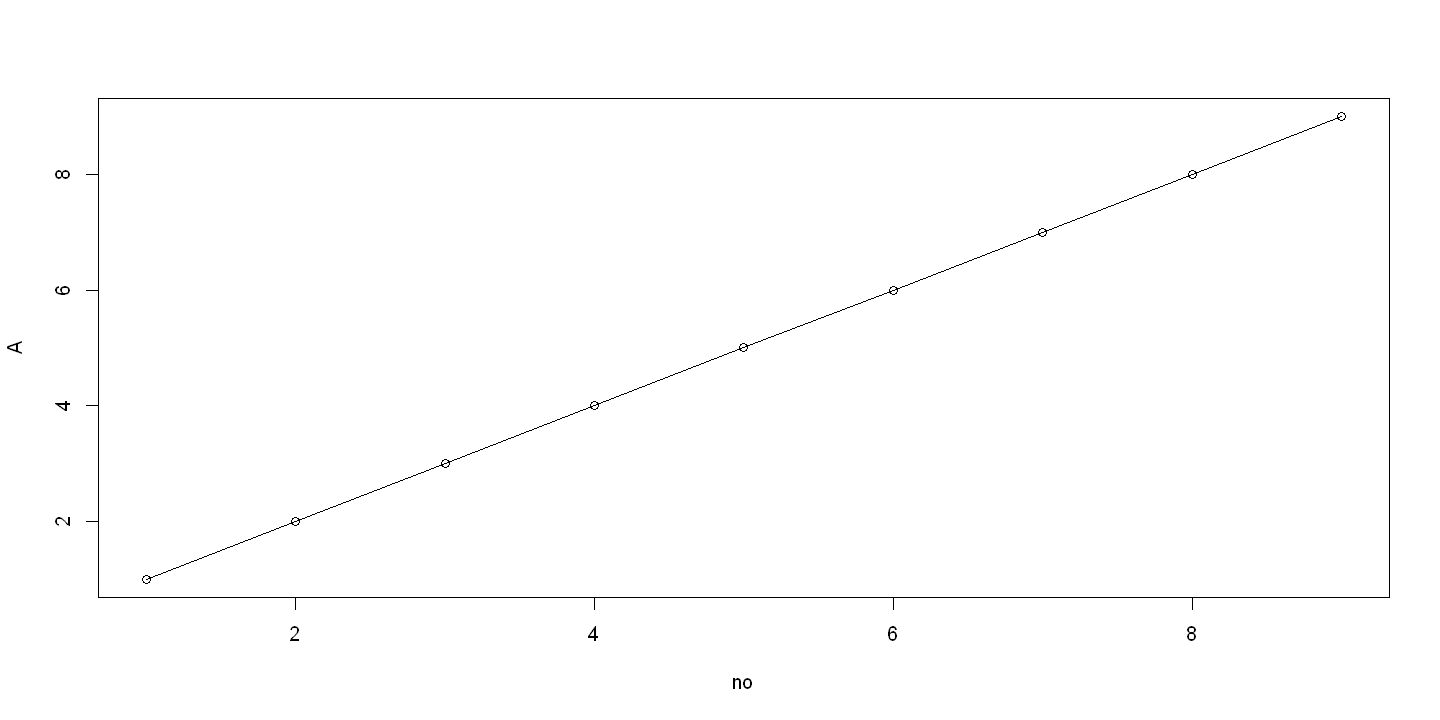

In [59]:
plot(df$A,type = 'o',xlab = "no",ylab = "A")

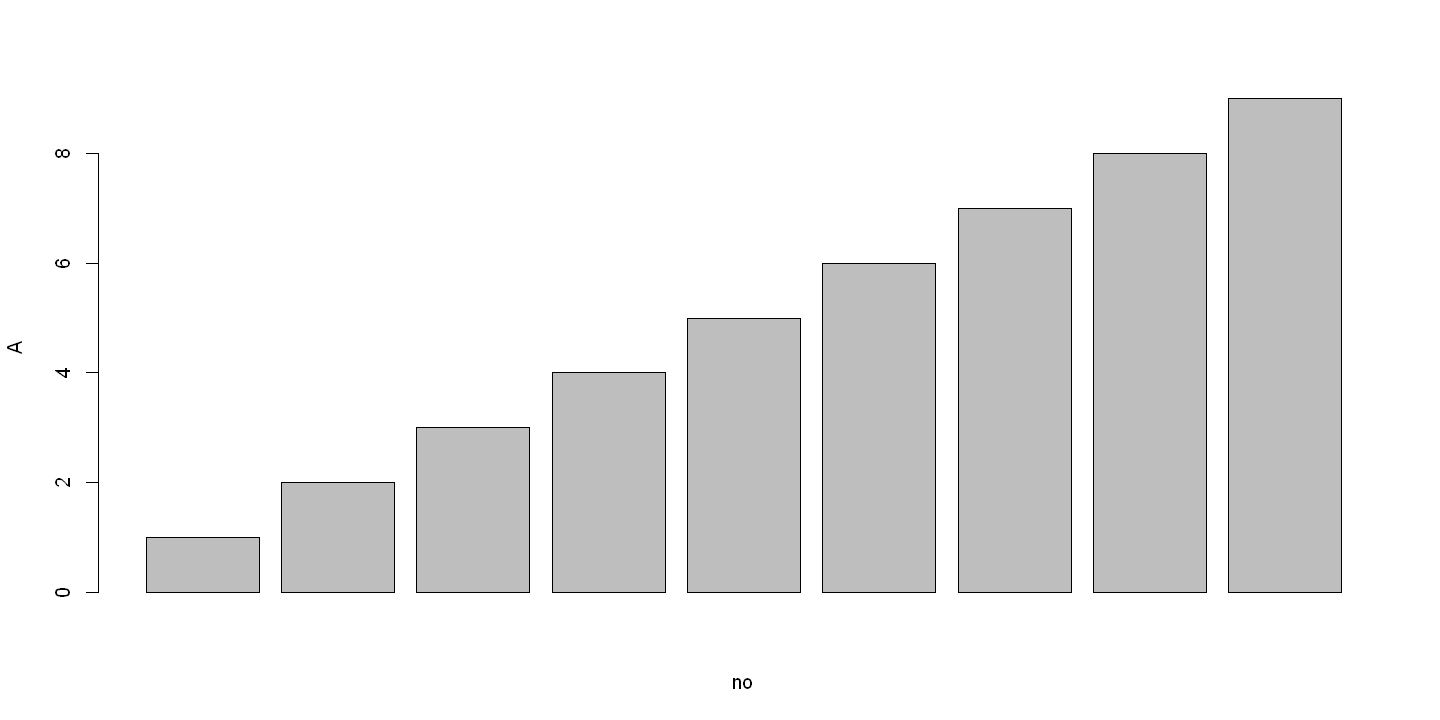

In [60]:
barplot(df$A, ylab = 'A',xlab = 'no')


---

**अस्वीकरण**:  
हा दस्तऐवज AI भाषांतर सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) चा वापर करून भाषांतरित करण्यात आला आहे. आम्ही अचूकतेसाठी प्रयत्नशील असलो तरी, कृपया लक्षात घ्या की स्वयंचलित भाषांतरांमध्ये त्रुटी किंवा अचूकतेचा अभाव असू शकतो. मूळ भाषेतील दस्तऐवज हा अधिकृत स्रोत मानला जावा. महत्त्वाच्या माहितीसाठी व्यावसायिक मानवी भाषांतराची शिफारस केली जाते. या भाषांतराचा वापर केल्यामुळे उद्भवणाऱ्या कोणत्याही गैरसमज किंवा चुकीच्या अर्थासाठी आम्ही जबाबदार राहणार नाही.
